In [1]:
import rubin_sim
from rubin_sim import maf
import matplotlib.pylab as plt
%matplotlib inline
import healpy as hp
import numpy as np
import glob

In [2]:
files = glob.glob('*10yrs.db')
files.sort()

In [3]:
files

['baseline_v2.1_10yrs.db', 'baseline_v2.2_10yrs.db']

Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Querying table None with constraint filter="u" and night < 365 and note not like "%%DD%%" for columns ['fieldDec', 'fieldRA', 'rotSkyPos', 'night']
Found 13086 visits
Running:  ['baseline_v2_1_10yrs_Count_night_u_and_night_lt_365_and_note_not_like_DD_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "filter="u" and night < 365 and note not like "%%DD%%"" constraint now.


0.0 180.0 -180.0 180.0


Plotting complete.
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Querying table None with constraint filter="u" and night < 365 and note not like "%%DD%%" for columns ['fieldDec', 'fieldRA', 'rotSkyPos', 'night']
Found 10497 visits
Running:  ['baseline_v2_2_10yrs_Count_night_u_and_night_lt_365_and_note_not_like_DD_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "filter="u" and night < 365 and note not like "%%DD%%"" constraint now.


0.0 180.0 -180.0 180.0


Plotting complete.


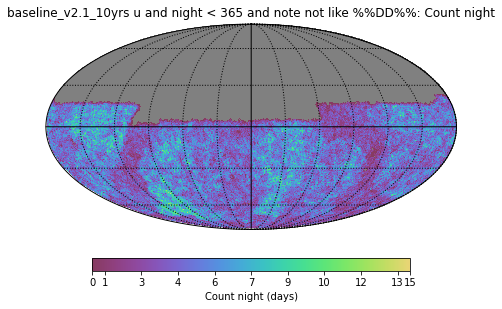

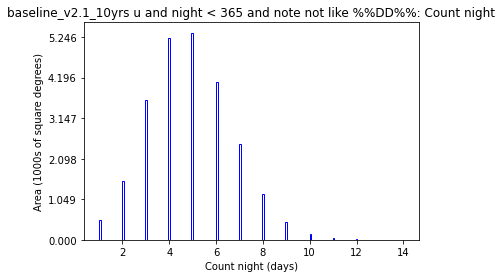

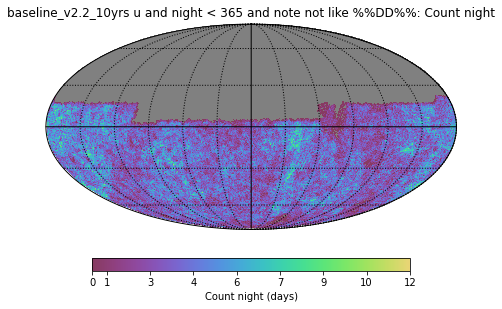

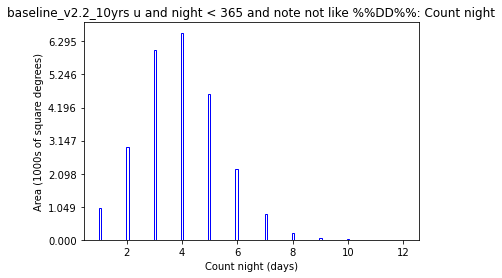

In [4]:
areas = []
for filename in files:
    runname = filename.split('/')[-1].replace('.db', '')
    slicer = maf.HealpixSlicer()
    # just count how many observations overlap the point
    metric = maf.CountMetric(col='night')
    # limit the data to just things on one night
    sql='filter="u" and night < 365 and note not like "%%DD%%"'
    summarystats = [maf.AreaThresholdMetric(lower_threshold=3)]
    
    bundle = maf.MetricBundle(metric, slicer, sql, runName=runname,
                             summaryMetrics=summarystats)
    bg = maf.MetricBundleGroup([bundle], filename, '.', None)
    bg.runAll()
    bg.plotAll(closefigs=False)
    
    areas.append(bundle.summaryValues)
    

In [5]:
for a,n in zip(areas, files):
    if a is None:
        print(n, None)
    else:
        print(n,a['AreaThreshold'])

baseline_v2.1_10yrs.db 19016.505589783315
baseline_v2.2_10yrs.db 14591.120021996134
